In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy.integrate import quad

import lilguys as lguys
from lilguys import units as lu
import arya
from glob import glob as glob


In [43]:
s1 = lguys.Snapshot.file("zeno/nfw_1e4.hdf5", gadget4=True)

In [46]:
s2 = lguys.Snapshot.file("zeno/nfw_scaled.hdf5", gadget4=True)

In [62]:
s2.IDs

array([   0,    1,    2, ..., 9995, 9996, 9999])

In [60]:
s2.m

1.942668e-05

In [57]:
np.median(s2.v)

0.08026467887740492

In [55]:
c = lguys.profile.center_snapshot(snap0)

In [58]:
np.median(c.v)

0.087039195

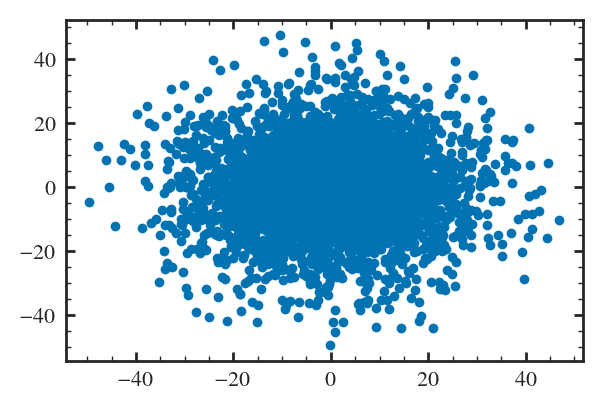

In [47]:
plt.scatter(s2.y, s2.x)


In [24]:
plt.scatter(snap0.v_x, snap0.v_y)

NameError: name 'snap0' is not defined

In [3]:
def get_most_bound(snap, verbose=False):
    idx = np.argmin(snap.potential)
    p0 = snap.pos[idx, :]
    v0 = snap.vel[idx, :]
    
    filt = snap.potential + 0.5 * np.sum((snap.vel-v0)**2, axis=1) < 0
    if verbose:
        print("bound fraction: ", np.mean(filt))

    p0 = np.mean(snap.pos[filt], axis=0)
    v0 = np.mean(snap.vel[filt], axis=0)
    return p0, v0

In [4]:
def center_snapshot(snap):
    x0, p0 = get_most_bound(snap)
    snap.shift(-x0, -p0)
    return snap

In [5]:
def get_Vc(snap, r):
    p0, v0 = get_most_bound(snap)
    n = np.sum(snap.r < r)
    vs =  np.sqrt(n * snap.m/r) 
    return vs * lu.V_0

In [6]:
def get_Vmax(snap, rs=np.linspace(0.25, 10, 100)):
    vs = [get_Vc(snap, r) for r in rs]
    idx_max = np.argmax(vs)
    return vs[idx_max], rs[idx_max]

In [26]:
filenames = glob("orbits/out/snapshot*.hdf5")
Nf = len(filenames)

In [9]:


snap_xs = np.empty((Nf, 3))
v_disp = np.empty((Nf))
rs = np.empty(Nf)
Rs = 2

for i in range(Nf):
    snap = lguys.Snapshot.file(filenames[i])
    p0, v0 = get_most_bound(snap)
    snap_xs[i] = p0
    center_snapshot(snap)    
    #filt = np.isin(IDs, ID_stars)
    v_disp[i], rs[i] = get_Vmax(snap)

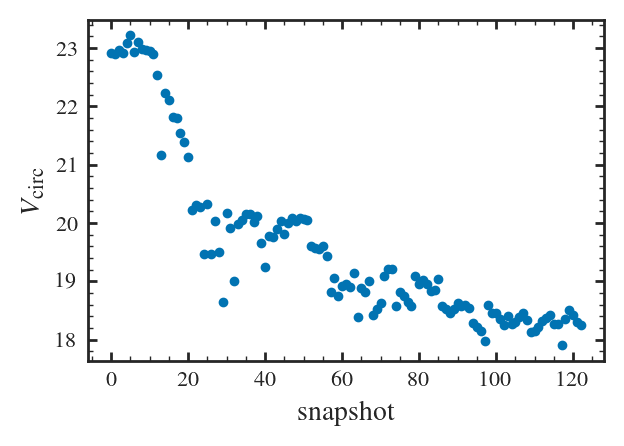

In [10]:
plt.scatter(np.arange(Nf), v_disp)
plt.xlabel("snapshot")
plt.ylabel(r"$V_{\rm circ}$")
plt.savefig("v_circ.pdf")

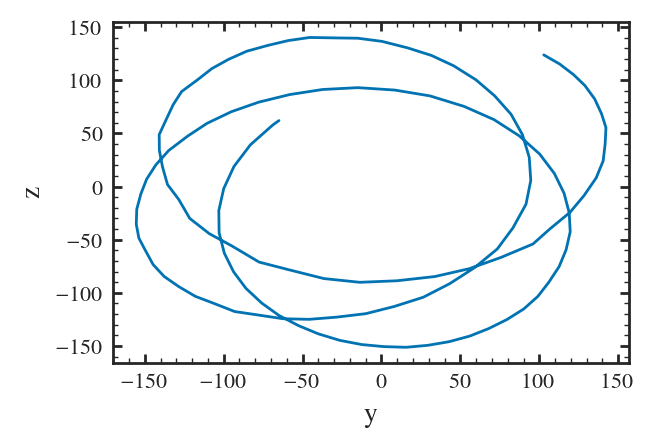

In [16]:
plt.plot(snap_xs[:, 1], snap_xs[:, 2])
plt.xlabel("y")
plt.ylabel("z")
plt.savefig("center_orbit.pdf")

MovieWriter ffmpeg unavailable; using Pillow instead.


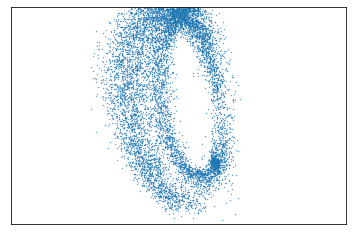

In [251]:
x, y, z = get_xy(f0)
fig = plt.figure()
scat = plt.scatter(x, z, s=0.1)

fnames = glob("orbits/out/snapshot*.hdf5")
plt.xlim(-180, 160)
plt.ylim(-150, 150)
plt.xticks([])
plt.yticks([])
    
def update_fig(i, scat):
    f = h5py.File(fnames[i], "r")
    x, y, z = get_xy(f)
    scat.set_offsets(np.array([x, y]).transpose())
    f.close()
    return scat, 
    
ani = mpl.animation.FuncAnimation(fig, update_fig, frames=range(len(fnames)),
                                  fargs=(scat,))

ani.save("orbit.gif", dpi=200)
plt.show()

In [8]:
filenames = glob("orbits/out/snapshot*.hdf5")


NameError: name 'glob' is not defined

MovieWriter ffmpeg unavailable; using Pillow instead.


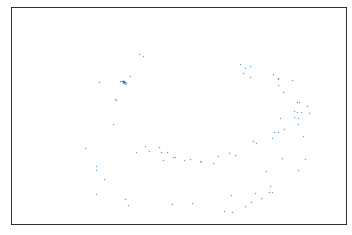

In [717]:
x, y, z = get_xy(f0)
IDs = f0["PartType1/ParticleIDs"][()]
filt = np.isin(IDs, ID_stars)

fig = plt.figure()
scat = plt.scatter(y[filt], z[filt], s=0.1)

plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.xticks([])
plt.yticks([])
    
def update_fig(i, scat):
    f = h5py.File(fnames[i], "r")
    IDs = f0["PartType1/ParticleIDs"][()]
    filt = np.isin(IDs, ID_stars)

    x, y, z = get_xy(f)
    scat.set_offsets(np.array([y[filt], z[filt]]).transpose())
    f.close()
    return scat, 
    
ani = mpl.animation.FuncAnimation(fig, update_fig, frames=range(len(fnames)),
                                  fargs=(scat,))

ani.save("stars.gif", dpi=200)
plt.show()

In [7]:
snap0 = lguys.Snapshot.file(filenames[0])


NameError: name 'filenames' is not defined

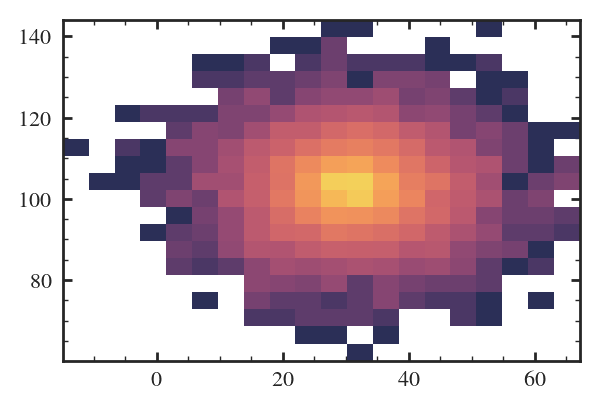

In [22]:
plt.hist2d(snap0.x, snap0.y, norm=mpl.colors.LogNorm(1, 1e3), cmin=1, bins=20);


In [24]:
obs = lguys.coords.to_sky(snap0)

In [27]:
def get_mid_coord(snap):
    p0, v0 = get_most_bound(snap)
    phase = lguys.coords.phase_point(*p0, *v0)
    return lguys.coords.to_sky(phase)

In [28]:
mid_obs = get_mid_coord(snap0)

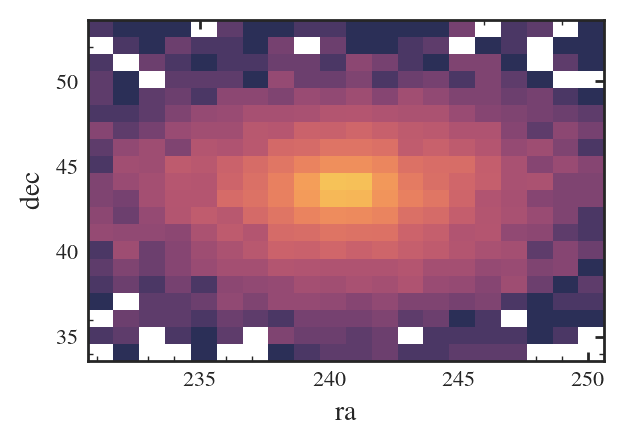

In [31]:
d_deg = 10
ra_0 = mid_obs.ra
dec_0 = mid_obs.dec

plt.hist2d(obs.ra, obs.dec, 20,norm=mpl.colors.LogNorm(1, 1e3),
           range=((ra_0-d_deg, ra_0+d_deg), (dec_0-d_deg, dec_0+d_deg)));
plt.xlabel("ra")
plt.ylabel("dec")
plt.savefig("skyproj_init.pdf")

In [157]:
filename_f = "orbits/out/snapshot_121.hdf5"
snap_f = lguys.Snapshot.file(filename_f)

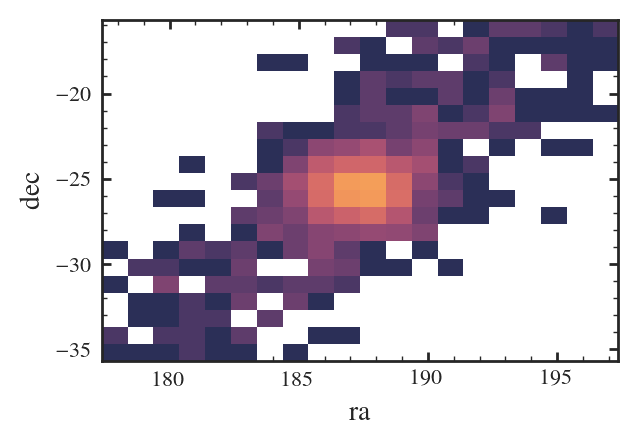

In [35]:
mid_obs = get_mid_coord(snap_f)
obs = lguys.coords.to_sky(snap_f)
d_deg = 10
ra_0 = mid_obs.ra
dec_0 = mid_obs.dec

plt.hist2d(obs.ra, obs.dec, 20,norm=mpl.colors.LogNorm(1, 1e3),
           range=((ra_0-d_deg, ra_0+d_deg), (dec_0-d_deg, dec_0+d_deg)));
plt.xlabel("ra")
plt.ylabel("dec")
plt.savefig("skyproj_fin.pdf")

Text(0, 0.5, 'v')

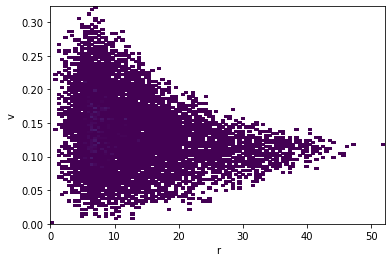

In [ ]:
plt.hist2d(r, v, norm=mpl.colors.LogNorm(10, 1e5), cmin=0, bins=100);
plt.xlabel("r")
plt.ylabel("v")

Text(0.5, 0, 'R')

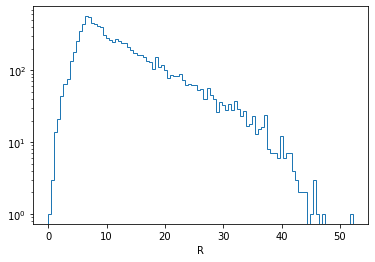

In [267]:
plt.hist(r, 100, histtype="step")
plt.yscale("log")
plt.xlabel("R")

In [268]:
f1 = h5py.File("isolation/out/snapshot_001.hdf5", "r")

In [269]:
pos1 = f1["PartType1/Coordinates"][()]
x1 = pos1[:, 0]
y1 = pos1[:, 1]
z1 = pos1[:, 2]
r1 = np.sqrt(x1**2 + y1**2 + z1**2)
vel1 = f1["PartType1/Velocities"][()]
vx1 = vel1[:, 0]
xy1 = vel1[:, 1]
vz1 = vel1[:, 2]
v1 = np.sum(vel1**2, axis=1)
r1 = np.sum(pos1**2, axis=1)

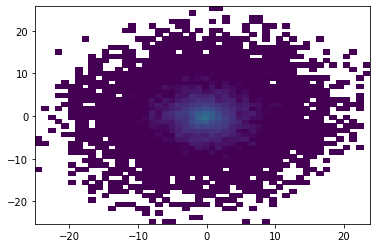

In [270]:
dx = 100
n_bin = 50
plt.hist2d(x1, y1, norm=mpl.colors.LogNorm(10, 1e5), cmin=1, bins=50);

Text(0.5, 0, 'R')

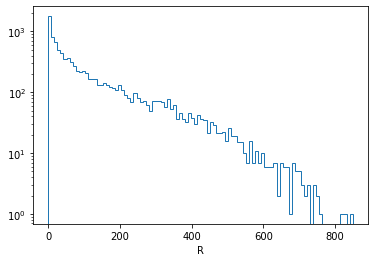

In [271]:
plt.hist(r1, 100, histtype="step")
plt.yscale("log")
plt.xlabel("R")

Text(0, 0.5, 'v')

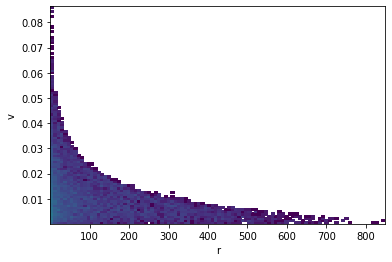

In [272]:
dx = 30
dy = 1e-10
n_bin = 50
plt.hist2d(r1, v1, norm=mpl.colors.LogNorm(1, 1e5), cmin=0, bins=100);
plt.xlabel("r")
plt.ylabel("v")

# Calculate stellar probabilities

In [15]:
from lilguys import profile

In [27]:
snap0 = lguys.Snapshot.file(filenames[1])

In [112]:
G = 1
EPSREL = 1e-7

# profile scale radius and index
n = 1
rsS = 2 # kpc, input

EN = 20
DF_Nr = 20

In [132]:
snap0 = lguys.profile.center_snapshot(snap0)

r = snap0.r

idx_sort = np.argsort(r)

m = snap0.m
N = len(r)
Mr = m * np.arange(N)

N = len(r)
Φ = snap0.potential
IDs = snap0.IDs
# Phi = -G * (Mr/r[idx_sort] + np.cumsum(m / r[idx_sort][::-1])[::-1])

In [133]:
E_kin = 1/2 * np.sum(snap0.vel**2, axis=1)
E_kin = np.array(E_kin)
Etot = E_kin + Φ[np.argsort(idx_sort)]

In [134]:
def ρ_star(r):
    return np.exp(-(r/rsS)**(1/n))

def ρ_s_int(r):
    return 4*np.pi * r**2 * ρ_star(r)

M_star = quad(ρ_s_int, 0., np.inf)[0]
M_star_r = np.vectorize(lambda x: quad(ρ_s_int, 0, x)[0])

In [135]:
DF_r_max = np.max(r)
DF_r_min = np.min(r[r > 2*EPSREL])
bins = np.logspace(np.log10(DF_r_min), np.log10(DF_r_max), num=DF_Nr)
DFr = 1/2 * (bins[1:] + bins[:-1])

In [136]:
NinS = quad(ρ_s_int, 0, DF_r_min)[0]  / M_star

NoutS = 1 - quad(ρ_s_int, 0, DF_r_max)[0]/M_star

In [154]:
prof = lguys.profile.Profile(snap0)

In [158]:
prof_f = lguys.profile.Profile(snap_f)

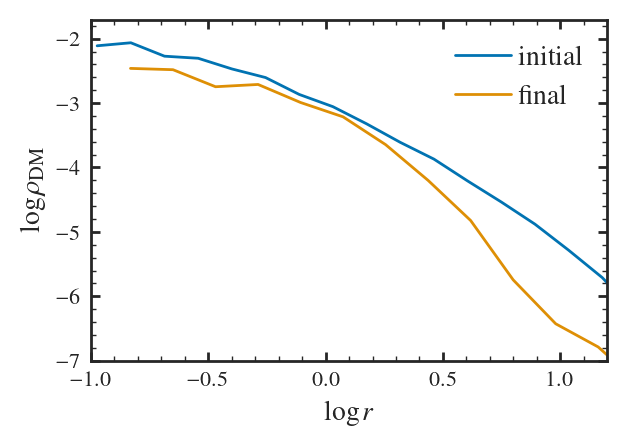

In [ ]:
plt.plot(np.log10(prof.r), np.log10(prof.nu_DM), label="initial")

plt.plot(np.log10(prof_f.r), np.log10(prof_f.nu_DM), label="final")
plt.xlabel(r"$\log r$")
plt.ylabel(r"$\log \rho_{\rm DM}$")
plt.ylim(-7)
plt.xlim(-1, 1.2)
plt.legend()
plt.savefig("dm_density.pdf")

In [149]:
M_star_r

In [146]:
M_star

201.06192982974676

In [138]:
psi = - np.interp(DFr, r[idx_sort], Φ)

nuDM, edges = np.histogram(r, bins=bins)
dV = (4/3 * np.pi * (edges[1:]**3 - edges[:-1]**3))
nuDM = nuDM * m / dV

DF_rm = 1/2*(edges[1:] + edges[:-1])

In [43]:
nuS = ρ_star(DF_rm) / M_star

In [150]:
M_cum = np.interp(DF_rm, r[idx_sort], Mr)
M_star_cum = M_star_r(DF_rm)

In [151]:
M_star_cum

array([4.86570781e-03, 1.28998762e-02, 3.39930305e-02, 8.88258402e-02,
       2.29417168e-01, 5.83058259e-01, 1.44925009e+00, 3.49390168e+00,
       8.07903725e+00, 1.76553687e+01, 3.57800928e+01, 6.57173657e+01,
       1.06701966e+02, 1.50054116e+02, 1.82282203e+02, 1.97116944e+02,
       2.00690622e+02, 2.01050689e+02, 2.01061861e+02])

/tmp/ipykernel_59075/1652554652.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(DF_rm), np.log10(nuDM), label="DM")


Text(0, 0.5, '$\\log_{10} \\nu$')

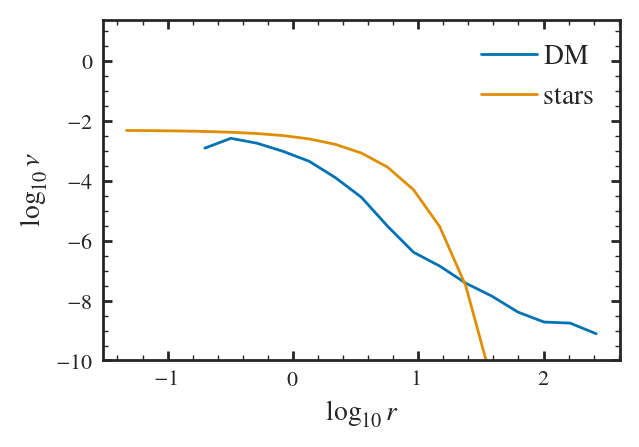

In [63]:
plt.plot(np.log10(DF_rm), np.log10(nuDM), label="DM")
plt.plot(np.log10(DF_rm), np.log10(nuS), label="stars")
plt.legend()
plt.ylim(-10)
plt.xlabel(r"$\log_{10} r$")
plt.ylabel(r"$\log_{10} \nu$")

Text(0.5, 0, '$\\log r$')

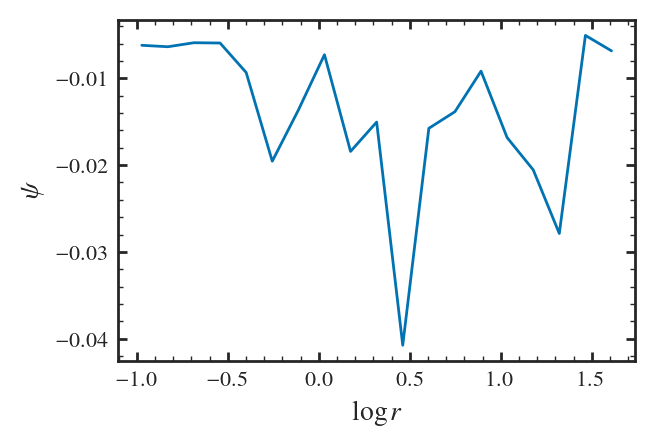

In [160]:
plt.plot(np.log10(DF_rm), -psi)
plt.ylabel(r"$\psi$")
plt.xlabel(r"$\log r$")

In [49]:
dndpDM   = np.gradient(nuDM,   psi)
d2nd2pDM = np.gradient(dndpDM, psi)
dndpS   = np.gradient(nuS,   psi)
d2nd2pS = np.gradient(dndpS, psi)

In [50]:
fS  = np.vectorize( lambda e: 1./(np.sqrt(8)*np.pi**2) * (quad( lambda p:  np.interp(p, psi[::-1], d2nd2pS[::-1]) / np.sqrt(e-p) , 0., e,  epsrel=EPSREL)[0]  ) ) # + np.interp(0., psi, dndp) / np.sqrt(
fDM = np.vectorize( lambda e: 1./(np.sqrt(8)*np.pi**2) * (quad( lambda p:  np.interp(p, psi[::-1], d2nd2pDM[::-1]) / np.sqrt(e-p) , 0., e,  epsrel=EPSREL)[0]  ) )


In [51]:
E_max = psi[0]
E_min = E_max / EN

In [52]:
E = np.linspace(E_min, E_max, EN)

In [53]:
DF_stars = fS(E)

In [54]:
DF_DM = fDM(E)

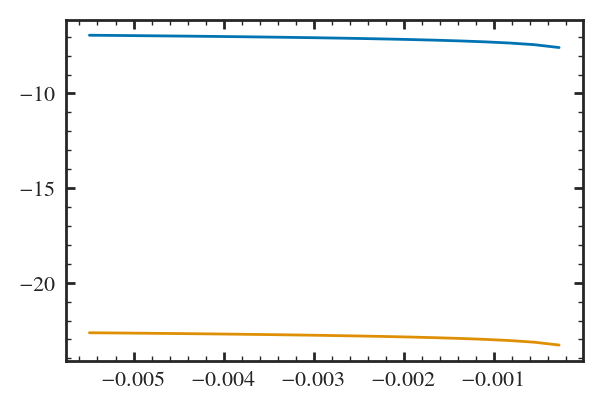

In [55]:
# plot DF vs -E
plt.plot(-E, np.log10(DF_DM))
plt.plot(-E, np.log10(DF_stars))

In [56]:
probs = np.interp(-Etot, E, DF_stars) / np.interp(-Etot, E, DF_DM)

In [57]:
probs /= np.sum(probs)

In [58]:
nuS_Nbody, edges = np.histogram(r, weights=probs, bins=bins)
nuS_Nbody = nuS_Nbody / dV

/tmp/ipykernel_59075/1322621873.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(DF_rm), np.log10(nuS_Nbody))


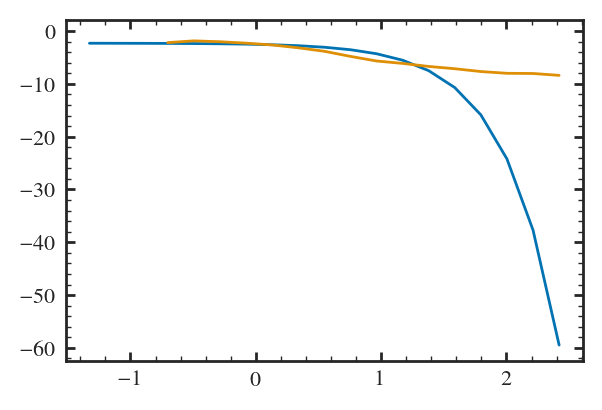

In [59]:
plt.plot(np.log10(DF_rm), np.log10(nuS))
plt.plot(np.log10(DF_rm), np.log10(nuS_Nbody))

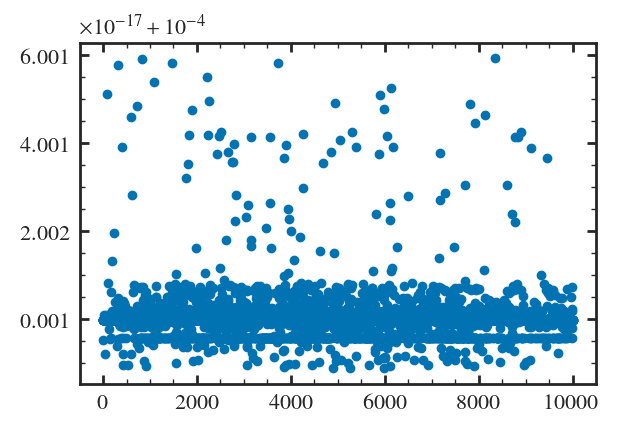

In [60]:
plt.scatter(IDs, probs)

In [61]:
Ns = 100

ID_stars = IDs[probs*Ns > np.random.uniform(size=N)]

In [62]:
ID_stars

array([9814, 8471, 3691, 5297, 2915, 6679, 5207, 6486, 3669, 7361, 9788,
       8769, 7255, 7646, 6513, 1543, 2336, 1533, 4080, 1055, 2295, 1440,
       1867, 2863, 5183, 4634, 4880, 6890, 9360, 7777, 7174, 9962, 8208,
       6534, 5928, 9472, 5521, 4499, 7210, 7701, 9153, 3680, 6614, 9127,
       8155, 8125, 5996, 7712, 5657, 2278, 5820, 4552,  711, 2910, 2069,
       2289, 7270, 3193, 3283, 9453, 9048, 9530, 9400, 9992, 8409, 5163,
       4845, 4037, 1293, 5599, 4641, 2518, 1755, 1660, 3013, 3946, 7863,
       9310, 7928, 5319, 6077, 4908, 4313, 3860, 2984,  614, 3260, 3725,
         93,  464,  934,  765,   33, 4467, 1125, 2377, 9748, 9897, 9281,
       4311, 4220, 6038, 6856, 8836, 8210, 9557, 9970, 6976, 4241],
      dtype=uint32)